<a href="https://colab.research.google.com/github/Saudul-12/Association_Rules/blob/main/Assosiation_Rules_Assignment_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prepare rules for the books.csv data set.**


**Try different values of support and confidence. Observe the change in number of rules for different support,confidence values.**

**Visulize the obtained rules using different plots.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
books = pd.read_csv('book.csv')
books

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [4]:
frequent_itemsets = apriori(books, min_support=0.1, use_colnames= True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [5]:
frequent_itemsets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   39 non-null     float64
 1   itemsets  39 non-null     object 
dtypes: float64(1), object(1)
memory usage: 752.0+ bytes


In [6]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold= 1)
rules
rules.sort_values('lift', ascending= False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
80,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
87,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
82,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
99,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
94,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


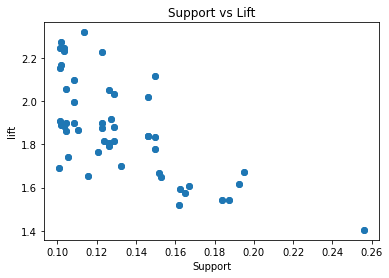

In [7]:
plt.scatter('support','lift',data=rules)
plt.xlabel('Support')
plt.ylabel("lift")
plt.title('Support vs Lift')
plt.show()

**RULE NUMBER 2 FOR DIFFERENT SUPPORT VALUE**

In [8]:
frequent_itemsets2 = apriori(books, min_support=0.2,use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


In [13]:
rules2 = association_rules(frequent_itemsets2, metric= 'lift', min_threshold=1)
rules2
rules2.sort_values('lift', ascending= False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


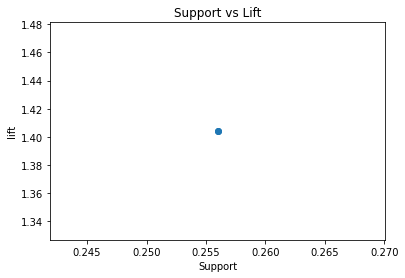

In [14]:
plt.scatter('support','lift',data=rules2)
plt.xlabel('Support')
plt.ylabel("lift")
plt.title('Support vs Lift')
plt.show()

**RULR NUMBER 3 FOR ANOTHER SUPPORT VALUE**

In [15]:
frequent_itemsets3 = apriori(books, min_support=0.05, use_colnames= True)
frequent_itemsets3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(DoItYBks, YouthBks, GeogBks, CookBks)"
96,0.0560,"(YouthBks, GeogBks, ArtBks, CookBks)"
97,0.0650,"(DoItYBks, CookBks, GeogBks, ArtBks)"
98,0.0510,"(DoItYBks, YouthBks, GeogBks, ChildBks, CookBks)"


In [16]:
rule3 = association_rules(frequent_itemsets3, metric = 'confidence', min_threshold=1)
rule3
rule3.sort_values('confidence', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.0,2.320186,0.064582,inf
1,"(ChildBks, ItalCook)",(CookBks),0.0850,0.431,0.0850,1.0,2.320186,0.048365,inf
2,"(ItalCook, YouthBks)",(CookBks),0.0590,0.431,0.0590,1.0,2.320186,0.033571,inf
3,"(DoItYBks, ItalCook)",(CookBks),0.0585,0.431,0.0585,1.0,2.320186,0.033287,inf
4,"(ItalCook, ArtBks)",(CookBks),0.0565,0.431,0.0565,1.0,2.320186,0.032148,inf


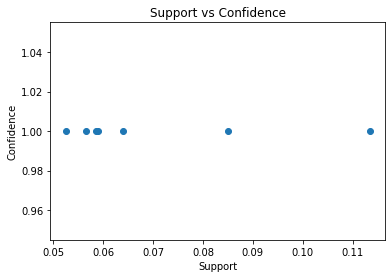

In [18]:
plt.scatter('support','confidence',data=rule3)
plt.xlabel('Support')
plt.ylabel("Confidence")
plt.title('Support vs Confidence')
plt.show()